<a href="https://colab.research.google.com/github/bernardosnap/MVP---Sprint-Machine-Learning-Analytics/blob/main/MVP_Sprint_Machine_Learning_%26_Analytics_Problema_de_Classifica%C3%A7%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Definição do Problema

**A Ascensão da NFL no Brasil e o Desafio da Predição do Hall da Fama**

Nos últimos anos, o Brasil tem presenciado um crescimento exponencial do interesse pela NFL. A liga americana de futebol americano conquista cada vez mais fãs, impulsionada por transmissões na TV aberta, aumento da oferta de produtos licenciados e a realização de eventos específicos para o público brasileiro.

Esse cenário culminou no primeiro jogo em solo nacional, a ser realizado entre Philadelphia Eagles e Green Bay Packers no dia 6 de setembro, em São Paulo.

Com isso em mente e, com o auxílio de machine learning, propõe-se um problema de classificação de jogadores da NFL como membros do Hall da Fama ou não, ou seja, qual jogador está apto a ser imortalizado com a maior honraria que um profissional de futebol americano pode receber. Este modelo pode ser utilizado para auxiliar na tomada de decisões relacionadas à seleção de novos membros, ou para fins de pesquisa e análise de dados históricos da liga.


**Premissas e Hipóteses**

Para o problema em questão, algumas premissas e hipóteses são levantadas, dentre elas:



*   Existem características dos jogadores que podem ser utilizadas para prever se eles serão membros do Hall da Fama. Estas características podem incluir estatísticas de desempenho, prêmios e reconhecimentos, tempo de carreira, e outros fatores relevantes.
*   Um modelo de machine learning pode ser treinado com base em dados históricos de jogadores da NFL para aprender a identificar estas características e fazer previsões precisas sobre a probabilidade de um novo jogador ser membro do Hall of Fame.
*   O modelo pode ser utilizado para auxiliar na avaliação de novos candidatos ao Hall of Fame, fornecendo uma perspectiva adicional e objetiva para a decisão final.





**Restrições e Condições para Seleção de Dados**

A fim de garantir uma qualidade e confiabilidade do modelo, algumas restrições e condições foram usadas para seleção dos dados:

*   **Qualidade dos dados:** os dados utilizados para treinar o modelo são precisos e consistentes.
*   **Diversidade do dataset:** o dataset inclui jogadores de diferentes épocas e posições, garantindo que o modelo seja capaz de generalizar para novas situações.


Infelizmente, não há oferta de um único dataset com linhas preenchidas com características relevantes e a distinção entre membros do Hall da Fama ou não. A solução encontrada foi juntar dois dataframes disponíveis no Kaggle, o primeiro com dados de jogadores provenientes das faculdades e que adentraram na liga a partir do sistem de Draft, de 1970 a 2021 e o segundo com apenas dados de jogadores que foram selecionados para o hall da fama.



**Importação de bibliotecas**

In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import urllib.request
from PIL import Image
from IPython.display import display
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import RFE
from sklearn.feature_selection import f_classif
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_auc_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

**Apresentação dos datasets**

In [2]:
draft = 'https://raw.githubusercontent.com/bernardosnap/MVP---Sprint-Machine-Learning-Analytics/main/dataframes/nfl_draft_1970-2021.csv'
dt_draft = pd.read_csv(draft)

dt_draft.head()

,year,round,pick,team,player,position,age,to,all_pro,pro_bowl,...,rush_att,rush_yards,rush_tds,receptions,rec_yards,rec_tds,interceptions,sacks,tackles,college
0,1970,1,1,PIT,Terry Bradshaw,QB,22.0,1983.0,1,3,...,444.0,2257.0,32.0,0.0,1.0,0.0,NaN,NaN,NaN,Louisiana Tech
1,1970,1,2,GNB,Mike McCoy,DT,22.0,1980.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,NaN,Notre Dame
2,1970,1,3,CLE,Mike Phipps,QB,22.0,1981.0,0,0,...,254.0,1278.0,13.0,0.0,0.0,0.0,NaN,NaN,NaN,Purdue
3,1970,1,4,BOS,Phil Olsen,DT,22.0,1976.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,Utah St.
4,1970,1,5,BUF,Al Cowlings,DE,23.0,1979.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,USC


O dataset acima é referente aos jogadores provenientes das faculdades e que adentraram na liga, de 1970 a 2021. Os jogadores foram selecionados a partir do sistema de Draft, que é um evento anual em que as equipes escolhem jogadores universitários elegíveis para se juntar às suas equipes profissionais, com a ordem de seleção determinada pela classificação das equipes na temporada anterior, ou seja, times que tiveram as piores campanhas têm a chance de escolher antes os melhores jogadores disponíveis provenientes das universidades.


**COLUNAS DO DATAFRAME**

*   **year**: ano em que o jogador foi escolhido
*   **round**: rodada em que o jogador foi escolhido
*   **pick**: posição em que o jogador foi escolhido
*   **team**: time que o selecionou
*   **player**: nome do jogador
*   **position**: posição em que atua o jogador
*   **age**: idade
*   **to**: até qual o ano durou a carreira do atleta (jogadores em atividade -> 2020)
*   **all_pro**: quantas vezes o jogador foi considero o melhor da sua posição durante a temporada
*   **pro_bowl**: quantas vezes o jogador foi selecionado para o jogo festivo das estrelas da liga
*   **starter**: número de temporadas em que o jogador foi titular do time
*   **carAV**: uma abreviação de "Career Approximate Value", uma métrica estatística desenvolvida pelo site Pro Football Reference para avaliar o desempenho geral de um jogador da NFL ao longo de sua carreira.
*   **drAV**: é quanto do valor de carAV foi para o time que o selecionou (caso o atleta passe a carreira inteira no mesmo time, carAV e drAV serão iguais)
*   **games**: número de jogos na carreira
*   **pass_comp**: número de passes completados na carreira
*   **pass_att**: tentativas de passe na carreira
*   **pass_yards**: número de jardas passadas na carreira
*   **pass_tds**:  número total de touchdowns marcados que foram lançados pelo atleta
*   **pass_int**: número de vezes que o jogador lançou a bola e ela foi interceptada por um jogador da equipe adversária
*   **rush_att**: número total de vezes que o jogador tentou correr com a bola
*   **rush_yards**: total de jardas ganhas por um jogador ao correr com a bola
*   **rush_tds**: número total de touchdowns marcados por um jogador correndo com a bola
*   **receptions**: número de vezes que um jogador recebeu a bola lançada por um quarterback
*   **rec_yards**: jardas totais ganhas por um jogador após receber um passe
*   **rec_tds**: número de touchdowns marcados por um jogador após receber um passe
*   **interceptions**: número de vezes que um jogador da defesa interceptou um passe lançado pelo quarterback adversário
*   **sacks**: número de vezes que um jogador da defesa derrubou o quarterback adversário atrás da linha de scrimmage (linha imaginária que atravessa o campo de futebol americano e marca a posição inicial de cada jogada) antes que ele possa passar ou correr com a bola
*   **tackles**: número de vezes que um jogador fez um tackle, que é uma tentativa de parar o avanço do jogador que está com a posse da bola
*   **college**: faculdade na qual o atleta estudou


In [3]:
hof = 'https://raw.githubusercontent.com/bernardosnap/MVP---Sprint-Machine-Learning-Analytics/main/dataframes/nflhofplayers.csv'
dt_hof = pd.read_csv(hof)

dt_hof.head()

,id,rank,player,position,year_inducted,from,to,all_pro_selections,pro_bowl_selections,years_as_starter,...,longest_rush,receptions,receiving_yards,receiving_td,longest_reception,all_purpose_yards,td_total,tackles,sacks,interception
0,1,1,Tony Boselli,T,2022,1995,2001,3,5,6,...,NaN,NaN,NaN,NaN,NaN,2,0,1,0.0,0
1,2,2,Cliff Branch,WR,2022,1972,1985,3,4,11,...,20.0,501.0,8685.0,67.0,99.0,8969,67,0,0.0,0
2,3,3,LeRoy Butler,DB,2022,1990,2001,4,4,11,...,NaN,NaN,NaN,NaN,NaN,609,3,889,20.5,38
3,4,4,Sam Mills,LB,2022,1986,1997,1,5,11,...,NaN,NaN,NaN,NaN,NaN,285,4,1265,20.5,11
4,5,5,Richard Seymour,DE,2022,2001,2012,3,7,11,...,NaN,NaN,NaN,NaN,NaN,87,1,498,57.5,2


Já, os dados acima são referentes aos membros imortalizados no hall da fama da liga, que serão utilizados para modificar o primeiro dataset, criando uma coluna **'hall_of_fame'** com 'True' ou 'False. Portanto, iremos deletar colunas de modo que se torna desnecessária a descrição de todo o dataframe.

In [4]:
dt_hof = dt_hof[['from','player','position']]

# Renomeando de modo que ambos tenham o mesmo nome para a coluna referente ao ano em que foi o jogador foi escolhido
dt_hof.rename(columns={'from': 'year'}, inplace=True)

Entretanto, como só temos dados de jogadores selecionados a partir de 1970, temos que cortar os nomes dos HOF de antes disso

In [5]:
dados_1970 = dt_hof['year'] >=1970
dt_hof = dt_hof[dados_1970]
dt_hof

,year,player,position
0,1995,Tony Boselli,T
1,1972,Cliff Branch,WR
2,1990,LeRoy Butler,DB
3,1986,Sam Mills,LB
4,2001,Richard Seymour,DE
...,...,...,...
177,1974,Jack Lambert,LB
179,1970,Mel Blount,DB
180,1970,Terry Bradshaw,QB
185,1971,Jack Ham,LB


# Limpeza dos Dados

Primeiramente, adicionamos uma nova coluna 'hall_of_fame' preenchidas com False em dt_draft. Essa coluna, para melhor visualização será inserida entre as colunas 'to' e 'all_pro'.

In [6]:
# Localização das colunas desejadas
coluna_to = dt_draft.columns.tolist()[:dt_draft.columns.get_loc('to')+1]
coluna_all_pro = dt_draft.columns.tolist()[dt_draft.columns.get_loc('all_pro'):]

# Adicionando a nova coluna 'hall_of_fame' preenchida com False
dt_draft['hall_of_fame'] = False

# Reordenando as colunas
dt_draft = dt_draft[coluna_to + ['hall_of_fame'] + coluna_all_pro]

dt_draft.head()

,year,round,pick,team,player,position,age,to,hall_of_fame,all_pro,...,rush_att,rush_yards,rush_tds,receptions,rec_yards,rec_tds,interceptions,sacks,tackles,college
0,1970,1,1,PIT,Terry Bradshaw,QB,22.0,1983.0,False,1,...,444.0,2257.0,32.0,0.0,1.0,0.0,NaN,NaN,NaN,Louisiana Tech
1,1970,1,2,GNB,Mike McCoy,DT,22.0,1980.0,False,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,NaN,Notre Dame
2,1970,1,3,CLE,Mike Phipps,QB,22.0,1981.0,False,0,...,254.0,1278.0,13.0,0.0,0.0,0.0,NaN,NaN,NaN,Purdue
3,1970,1,4,BOS,Phil Olsen,DT,22.0,1976.0,False,0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,Utah St.
4,1970,1,5,BUF,Al Cowlings,DE,23.0,1979.0,False,0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,USC


O procedimento de limpeza dos dados segue com a remoção julgadas como desnecessárias para a classificação dos dados, sendo elas:

*   o time que selecionou o atleta
*   a rodada na qual o jogador foi selecionado
*   o número da escolha do jogador
*   a idade do atleta
*   a sua universidade

Além disso, são deletadas as linhas 'to' (até qual o ano durou a carreira do atleta) que estão vazias.



In [7]:
dt_draft = dt_draft.drop(columns=['team', 'round', 'pick', 'age', 'college'])
dt_draft = dt_draft.dropna(subset=['to'])
dt_draft.sample(10)

,year,player,position,to,hall_of_fame,all_pro,pro_bowl,starter,carAV,drAV,...,pass_int,rush_att,rush_yards,rush_tds,receptions,rec_yards,rec_tds,interceptions,sacks,tackles
14188,2015,A.J. Derby,TE,2018.0,False,0,0,0,3.0,0.0,...,0.0,0.0,0.0,0.0,40.0,452.0,3.0,NaN,NaN,1.0
4853,1982,Reggie McElroy,T,1996.0,False,0,0,6,42.0,37.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
7499,1990,Steve Broussard,RB,1998.0,False,0,0,1,22.0,13.0,...,0.0,578.0,2625.0,19.0,126.0,882.0,3.0,NaN,NaN,NaN
14263,2016,Will Fuller,WR,2020.0,False,0,0,5,24.0,24.0,...,0.0,4.0,6.0,0.0,209.0,3110.0,24.0,NaN,NaN,NaN
8699,1993,Elvis Grbac,QB,2001.0,False,0,1,4,46.0,8.0,...,81.0,163.0,388.0,7.0,0.0,0.0,0.0,NaN,NaN,NaN
14214,2015,Austin Shepherd,T,2015.0,False,0,0,0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
5443,1983,Tim Spencer,RB,1990.0,False,0,0,4,14.0,14.0,...,0.0,474.0,1792.0,19.0,53.0,432.0,0.0,NaN,NaN,NaN
3999,1979,Bruce Kimball,G,1984.0,False,0,0,0,0.0,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
2466,1975,Joe Danelo,K,1984.0,False,0,0,0,21.0,NaN,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,NaN,NaN,NaN
1400,1973,Levi Johnson,DB,1977.0,False,0,0,4,35.0,35.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21.0,NaN,NaN


Em seguida, é feita uma comparação entre as posições dos jogadores presentes nos dois dataframes. Com isso, podemos remover posições que não tem ou tem pouca relevância na história, bem como, renomear algumas posições que possam estar com a nomenclatura diferente.

Para melhor visualização, apresentamos uma ilustração com as posições presentes no jogo.

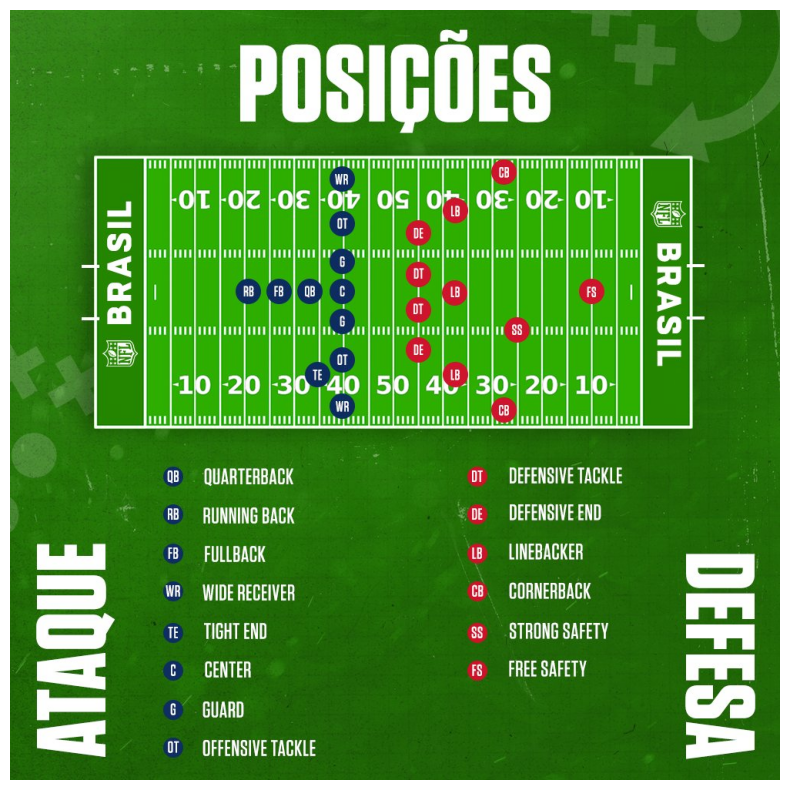

In [8]:
# Definição da URL da imagem
url = "https://github.com/bernardosnap/MVP---Sprint-Machine-Learning-Analytics/blob/main/pos-nfl.jpeg?raw=true"

# Abre a URL, lê o conteúdo da imagem e converte para um array numpy
response = urllib.request.urlopen(url)
img_array = np.array(Image.open(response))

# Define o tamanho da figura
plt.figure(figsize=(12, 10))

# Exibe a imagem usando matplotlib
plt.imshow(img_array)
plt.axis('off')
plt.show()

In [9]:
pos_draft = dt_draft['position'].value_counts()
pos_draft

position
DB     1848
LB     1531
WR     1383
RB     1255
DE      994
T       801
DT      722
G       687
TE      674
QB      502
C       320
CB      161
NT      137
P       119
K       118
S       113
FB       85
OLB      62
OL       35
ILB      32
DL        6
LS        5
WB        2
Name: count, dtype: int64

In [10]:
pos_hof = dt_hof['position'].value_counts()
pos_hof

position
DB    19
WR    18
RB    16
LB    15
DE    13
QB    13
T     10
G     10
DT     5
TE     5
C      5
K      1
P      1
Name: count, dtype: int64

In [11]:
# Analisando os dois conjuntos, removemos as posições listadas abaixo
posicoes_a_remover = ['FB', 'OL', 'DL', 'LS', 'WB', 'K', 'P']

# Removendo de dt_draft
dt_draft = dt_draft.drop(dt_draft[dt_draft['position'].isin(posicoes_a_remover)].index)

# Removendo de dt_hof
dt_hof = dt_hof.drop(dt_hof[dt_hof['position'].isin(posicoes_a_remover)].index)

Em relação a renomeação de posições, notamos que podemos agrupar algumas delas. Explica-se:



*   CB (cornerback) e S (safety) podem ser considerados, por convenção, DB (defensiveback)
*   NT (nose tackle) é um sinônimo de DT (defensive tackle)
*   OLB (outside linebacker) e ILB (inside linebacker) são tipos de LB (linebacker)
*   para melhor visualização, os T (tackles) serão renomeados para OT (offensive tackle)



In [12]:
# Renomeando colunas, conforme explicado acima.
dt_draft['position'].replace({'CB': 'DB', 'S': 'DB', 'NT': 'DT', 'T': 'OT', 'OLB': 'LB', 'ILB': 'LB'}, inplace=True)
dt_hof['position'].replace({'T': 'OT'}, inplace=True)

In [13]:
# Visualizando as posições após todas as exclusões e renomeações
pos_draft = dt_draft['position'].value_counts()
pos_draft

position
DB    2122
LB    1625
WR    1383
RB    1255
DE     994
DT     859
OT     801
G      687
TE     674
QB     502
C      320
Name: count, dtype: int64

In [14]:
# Visualizando as posições após todas as exclusões e renomeações
pos_hof = dt_hof['position'].value_counts()
pos_hof

position
DB    19
WR    18
RB    16
LB    15
DE    13
QB    13
OT    10
G     10
DT     5
TE     5
C      5
Name: count, dtype: int64

Ademais, há a presença de colunas com linhas vazias. Essas linhas serão analisadas uma a uma e preenchidas com valores nulos ou com a média das valores, a depender da natureza da coluna e do cenário referente ao jogador.

Antes de tudo, vemos quais são as colunas que têm tais valores nulos.

In [15]:
colunas_com_nan = dt_draft.isnull().any()

print(colunas_com_nan[colunas_com_nan])

drAV             True
games            True
pass_int         True
interceptions    True
sacks            True
tackles          True
dtype: bool


Com a lista acima em mãos, podemos trabalhar com a coluna 'games', ou seja, o número de jogos que o atleta tem/teve na carreira.

In [16]:
jogos_nulos = (dt_draft['games'].isnull())
dt_draft[jogos_nulos]

,year,player,position,to,hall_of_fame,all_pro,pro_bowl,starter,carAV,drAV,...,pass_int,rush_att,rush_yards,rush_tds,receptions,rec_yards,rec_tds,interceptions,sacks,tackles
12866,2010,Otis Hudson,OT,2012.0,False,0,0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
12942,2010,Reggie Stephens,C,2012.0,False,0,0,0,0.0,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
12964,2010,Zac Robinson,QB,2012.0,False,0,0,0,0.0,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
12969,2010,Tim Toone,WR,2012.0,False,0,0,0,0.0,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
13140,2011,Quan Sturdivant,LB,2012.0,False,0,0,0,0.0,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
13151,2011,Ronald Johnson,WR,2012.0,False,0,0,0,0.0,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
13176,2011,Korey Lindsey,DB,2012.0,False,0,0,0,0.0,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
13219,2011,Curtis Holcomb,DB,2012.0,False,0,0,0,0.0,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
13302,2012,Brandon Hardin,DB,2012.0,False,0,0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
13357,2012,Greg Childs,WR,2012.0,False,0,0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN


Todos os jogadores sem jogos computados têm numeros zerados nas outras estatísticas, logo, podemos preencher essa coluna com valores nulos.

In [17]:
dt_draft['games'].fillna(0.0, inplace=True)
dt_draft.sample(10)

,year,player,position,to,hall_of_fame,all_pro,pro_bowl,starter,carAV,drAV,...,pass_int,rush_att,rush_yards,rush_tds,receptions,rec_yards,rec_tds,interceptions,sacks,tackles
4755,1981,Robert Jackson,DB,1989.0,False,0,0,3,28.0,28.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0,NaN,NaN
8421,1992,Steve Gordon,C,1998.0,False,0,0,0,0.0,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
442,1971,Jim Plunkett,QB,1986.0,False,0,0,10,86.0,38.0,...,198.0,323.0,1337.0,14.0,0.0,0.0,0.0,NaN,NaN,NaN
11531,2005,Jordan Beck,LB,2007.0,False,0,0,0,2.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,19.0
11179,2003,Kevin Walter,WR,2012.0,False,0,0,6,36.0,NaN,...,0.0,13.0,82.0,0.0,356.0,4379.0,25.0,NaN,NaN,34.0
5493,1984,Terry Taylor,DB,1995.0,False,0,0,7,43.0,25.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25.0,NaN,NaN
8772,1994,Tydus Winans,WR,1996.0,False,0,0,0,4.0,4.0,...,0.0,1.0,5.0,0.0,23.0,421.0,2.0,NaN,NaN,NaN
5631,1984,John Witkowski,QB,1988.0,False,0,0,0,1.0,1.0,...,0.0,8.0,33.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
12800,2010,Daniel Te'o-Nesheim,DE,2013.0,False,0,0,2,12.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,5.0,36.0
11905,2006,Ethan Kilmer,WR,2006.0,False,0,0,0,2.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,14.0


A seguir, podemos analisar as colunas 'interceptions', 'sacks' e 'tackles', isto é, o número de vezes que um jogador da defesa interceptou um passe lançado pelo quarterback adversário, o número de vezes que um jogador da defesa derrubou o quarterback adversário atrás da linha de scrimmage (linha imaginária que atravessa o campo de futebol americano e marca a posição inicial de cada jogada) antes que ele possa passar ou correr com a bola e o número de vezes que um jogador fez um tackle, que é uma tentativa de parar o avanço do jogador que está com a posse da bola, respectivamente.

Com base nisso, podemos afirmar que é de bom grado atribuir valores zerados para jogadores que jogam no ataque.


In [18]:
# Separação das posições por tipo
posicoes_ataque = ['QB', 'RB', 'WR', 'TE', 'C', 'G', 'OT']
posicoes_defesa = ['DB','LB','DE','DT']

In [19]:
pos_buscadas_ataque = (dt_draft['position'].isin(posicoes_ataque))

dt_draft.loc[pos_buscadas_ataque, ['interceptions', 'sacks', 'tackles']] = dt_draft.loc[pos_buscadas_ataque, ['interceptions', 'sacks', 'tackles']].fillna(0.0)

dt_draft.sample(10)

,year,player,position,to,hall_of_fame,all_pro,pro_bowl,starter,carAV,drAV,...,pass_int,rush_att,rush_yards,rush_tds,receptions,rec_yards,rec_tds,interceptions,sacks,tackles
14043,2015,Rob Havenstein,OT,2020.0,False,0,0,6,39.0,39.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12340,2008,Stanford Keglar,LB,2010.0,False,0,0,0,3.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,18.0
2362,1975,Tom Alward,G,1976.0,False,0,0,1,3.0,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14553,2017,Ethan Pocic,C,2020.0,False,0,0,1,15.0,15.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
379,1970,Mike Carter,WR,1972.0,False,0,0,0,0.0,0.0,...,0.0,1.0,25.0,0.0,2.0,24.0,0.0,0.0,0.0,0.0
9753,1998,Jamie Duncan,LB,2004.0,False,0,0,3,27.0,18.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,3.0,233.0
7397,1989,Jason Phillips,WR,1993.0,False,0,0,1,5.0,4.0,...,0.0,0.0,0.0,0.0,49.0,578.0,2.0,0.0,0.0,0.0
8175,1992,Carl Pickens,WR,2000.0,False,0,2,8,56.0,55.0,...,0.0,6.0,6.0,0.0,540.0,7129.0,63.0,0.0,0.0,0.0
1361,1973,Barney Chavous,DE,1985.0,False,0,0,13,68.0,68.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,23.0,NaN
12174,2007,Michael Otto,OT,2013.0,False,0,0,0,7.0,7.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Olhando sob a ótica dos jogadores de defesa, também podemos atribuir valores nulos aos atletas que não possuem pelo menos uma temporada como titular da equipe.

In [20]:
defesa_starter_nulo = (dt_draft['position'].isin(posicoes_defesa))  & (dt_draft['starter'] == 0)

dt_draft.loc[defesa_starter_nulo, ['interceptions', 'sacks', 'tackles']] = dt_draft.loc[defesa_starter_nulo, ['interceptions', 'sacks', 'tackles']].fillna(0.0)

dt_draft.sample(10)

,year,player,position,to,hall_of_fame,all_pro,pro_bowl,starter,carAV,drAV,...,pass_int,rush_att,rush_yards,rush_tds,receptions,rec_yards,rec_tds,interceptions,sacks,tackles
7049,1988,Joey Howard,OT,1989.0,False,0,0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14188,2015,A.J. Derby,TE,2018.0,False,0,0,0,3.0,0.0,...,0.0,0.0,0.0,0.0,40.0,452.0,3.0,0.0,0.0,1.0
9771,1998,Lorenzo Bromell,DE,2004.0,False,0,0,0,11.0,7.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,27.5,97.0
3485,1978,Clay Matthews,LB,1996.0,False,0,4,16,95.0,89.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16.0,69.5,NaN
7553,1990,Marion Hobby,DE,1992.0,False,0,0,0,5.0,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0
14282,2016,Sterling Shepard,WR,2020.0,False,0,0,5,25.0,25.0,...,0.0,22.0,189.0,1.0,313.0,3518.0,20.0,0.0,0.0,0.0
3533,1978,Barry Bennett,DT,1988.0,False,0,0,5,31.0,7.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,18.5,NaN
4986,1982,Greg Smith,DE,1984.0,False,0,0,0,2.0,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3767,1978,Mark Donahue,G,1979.0,False,0,0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2709,1976,Sherman Smith,RB,1983.0,False,0,0,6,50.0,50.0,...,0.0,834.0,3520.0,28.0,217.0,2393.0,10.0,0.0,0.0,0.0


Podemos, também, trabalhar com a coluna 'pass_int', ou seja, o número de vezes que o jogador lançou a bola e ela foi interceptada por um jogador da equipe adversária.

No futebol americano, o responsável por lançar a bola é o QB (quarterback), com isso, iremos analisar se há algum jogador "não QB" que tem a coluna acima destacada sem informação e, consequentemente, zerar a mesma.

In [21]:
nao_qb = dt_draft['position'] != 'QB'

dt_draft.loc[nao_qb, ['pass_int']] = dt_draft.loc[nao_qb, ['pass_int']].fillna(0.0)
dt_draft.sample(10)

,year,player,position,to,hall_of_fame,all_pro,pro_bowl,starter,carAV,drAV,...,pass_int,rush_att,rush_yards,rush_tds,receptions,rec_yards,rec_tds,interceptions,sacks,tackles
30,1970,Lee Brooks,DT,1976.0,False,0,0,2,19.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,NaN
7937,1991,Floyd Fields,DB,1993.0,False,0,0,1,6.0,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,NaN
6829,1988,Aaron Jones,DE,1996.0,False,0,0,2,18.0,13.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,18.0,NaN
1221,1972,Jean Fugett,TE,1979.0,False,0,1,4,24.0,10.0,...,0.0,7.0,38.0,0.0,156.0,2270.0,28.0,0.0,0.0,0.0
9930,1999,Ebenezer Ekuban,DE,2008.0,False,0,0,5,37.0,17.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,36.5,213.0
4274,1980,Kenny Johnson,DB,1989.0,False,0,0,5,39.0,39.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.0,2.0,NaN
8249,1992,Tony McCoy,DT,2000.0,False,0,0,5,34.0,32.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,23.0,NaN
11406,2004,Jeff Dugan,TE,2010.0,False,0,0,0,2.0,2.0,...,0.0,11.0,23.0,0.0,27.0,191.0,3.0,0.0,0.0,3.0
12026,2007,Laurent Robinson,WR,2012.0,False,0,0,1,16.0,3.0,...,0.0,2.0,-14.0,0.0,167.0,2110.0,15.0,0.0,0.0,1.0
6921,1988,Charles Dimry,DB,1999.0,False,0,0,6,46.0,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21.0,1.0,NaN


Após as modificações supracitadas, vemos quais colunas ainda possuem valores nulos...

In [22]:
colunas_com_nan = dt_draft.isnull().any()

print(colunas_com_nan[colunas_com_nan])

drAV             True
interceptions    True
sacks            True
tackles          True
dtype: bool


Para essas colunas, a melhor abordagem é preenchê-las com a média. Ao fazer isso, diminuimos o impacto de valores extremos ou discrepantes, tornando os resultados mais consistentes e confiáveis.


Para isso, criamos uma função que recebe uma linha (row), o nome da coluna (col), e dois valores (valor1 e valor2). Ela verifica se o valor na coluna da linha é nulo. Se for, ela calcula a média dos valores na coluna col, filtrados onde os valores nas colunas valor1 e valor2 correspondem aos da linha atual, ou seja, faz um filtro de jogadores que possuem os mesmos 'valor1' e 'valor2' ('position' e 'starter' no caso em específico). Caso contrário, ela retorna o valor existente na coluna.



In [23]:
def preencher_nulos_com_media(linha, coluna, valor1, valor2):
    if pd.isnull(linha[coluna]):
        filtro = (dt_draft[valor1] == linha[valor1]) & (dt_draft[valor2] == linha[valor2])
        media = dt_draft[filtro][coluna].mean()
        return media
    else:
        return linha[coluna]

# Lista de colunas para aplicar a função
colunas = ['interceptions', 'drAV', 'sacks', 'tackles']
val1 = 'position'
val2 = 'starter'

# Preenchendo os valores nulos com a média agrupada por 'position', 'starter'
for coluna in colunas:
    dt_draft[coluna] = dt_draft.apply(preencher_nulos_com_media, args=(coluna,val1,val2), axis=1)
    dt_draft[coluna] = dt_draft[coluna].apply(lambda x: round(x) if pd.notnull(x) else x)
    dt_draft[coluna] = dt_draft[coluna].apply(lambda x: float(f"{x:.1f}") if pd.notnull(x) else x)

dt_draft.sample(10)

,year,player,position,to,hall_of_fame,all_pro,pro_bowl,starter,carAV,drAV,...,pass_int,rush_att,rush_yards,rush_tds,receptions,rec_yards,rec_tds,interceptions,sacks,tackles
10117,1999,Madre Hill,RB,2002.0,False,0,0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
8188,1992,Courtney Hawkins,WR,2000.0,False,0,0,5,35.0,19.0,...,0.0,20.0,50.0,0.0,366.0,4573.0,18.0,0.0,0.0,0.0
8132,1991,Antoine Bennett,DB,1992.0,False,0,0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14512,2017,Jonathan Allen,DE,2020.0,False,0,0,3,26.0,26.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,17.0,120.0
12833,2010,A.J. Edds,LB,2014.0,False,0,0,0,0.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
12104,2007,Kevin Boss,TE,2012.0,False,0,0,4,16.0,13.0,...,0.0,1.0,16.0,0.0,150.0,2033.0,22.0,0.0,0.0,1.0
14147,2015,Neiron Ball,LB,2015.0,False,0,0,0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,7.0
12887,2010,Anthony Dixon,RB,2015.0,False,0,0,0,7.0,3.0,...,0.0,274.0,934.0,11.0,23.0,140.0,0.0,0.0,0.0,31.0
13484,2013,Tavon Austin,WR,2020.0,False,0,0,4,25.0,22.0,...,0.0,196.0,1340.0,10.0,220.0,2026.0,15.0,0.0,0.0,1.0
2993,1976,Walter Tullis,WR,1979.0,False,0,0,0,2.0,2.0,...,0.0,0.0,0.0,0.0,10.0,173.0,1.0,0.0,0.0,0.0


Após o processo de preenchimento dos valores nulos com a média nas colunas específicas do dataframe, é importante visualizar como ficaram as linhas para garantir a precisão e integridade dos dados. Para isso, plotaremos a partir da coluna 'carAV'.

In [24]:
amostra_estatisticas = dt_draft.loc[:, 'carAV':].head(10)
print(amostra_estatisticas)

   carAV   drAV  games  pass_comp  pass_att  pass_yards  pass_tds  pass_int  \
0  106.0  106.0  168.0     2025.0    3901.0     27989.0     212.0     210.0   
1   44.0   41.0  132.0        0.0       0.0         0.0       0.0       0.0   
2   40.0   32.0  119.0      886.0    1799.0     10506.0      55.0     108.0   
3   20.0    7.0   79.0        0.0       0.0         0.0       0.0       0.0   
4   26.0   15.0  101.0        0.0       0.0         0.0       0.0       0.0   
5   42.0   19.0  124.0        0.0       0.0         0.0       0.0       0.0   
6   36.0   36.0   64.0        0.0       0.0         0.0       0.0       0.0   
7    0.0    0.0    7.0        0.0       0.0         0.0       0.0       0.0   
8   54.0   52.0  171.0        0.0       0.0         0.0       0.0       0.0   
9   66.0    1.0  156.0        0.0       3.0         0.0       0.0       0.0   

   rush_att  rush_yards  rush_tds  receptions  rec_yards  rec_tds  \
0     444.0      2257.0      32.0         0.0        1.0     

Uma preocupação é o valor de 'drAV' não ser maior do que o de 'carAV', visto que:

* carAV: uma abreviação de "Career Approximate Value", uma métrica estatística desenvolvida pelo site Pro Football Reference para avaliar o desempenho geral de um jogador da NFL ao longo de sua carreira.
* drAV: é quanto do valor de carAV foi para o time que o selecionou (caso o atleta passe a carreira inteira no mesmo time, carAV e drAV serão iguais)

Por isso, iremos igualar os valores caso um seja maior do que o outro

In [25]:
for index, row in dt_draft.iterrows():
    if row['drAV'] > row['carAV']:
        dt_draft.at[index, 'drAV'] = row['carAV']

dt_draft.sample(10)

,year,player,position,to,hall_of_fame,all_pro,pro_bowl,starter,carAV,drAV,...,pass_int,rush_att,rush_yards,rush_tds,receptions,rec_yards,rec_tds,interceptions,sacks,tackles
14830,2018,Tracy Walker,DB,2020.0,False,0,0,1,7.0,7.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,164.0
12201,2007,Ahmad Bradshaw,RB,2015.0,False,0,0,3,42.0,36.0,...,0.0,1083.0,4928.0,36.0,187.0,1493.0,12.0,0.0,0.0,18.0
5949,1985,Steve Bono,QB,1999.0,False,0,1,2,32.0,0.0,...,42.0,125.0,257.0,7.0,1.0,2.0,0.0,0.0,0.0,0.0
12154,2007,Daren Stone,DB,2008.0,False,0,0,0,2.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0
15348,2020,Jonathan Greenard,DE,2020.0,False,0,0,0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,10.0
485,1971,Wayne Walton,OT,1974.0,False,0,0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12730,2010,Derrick Morgan,DE,2018.0,False,0,0,8,41.0,41.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,44.0,208.0
13603,2013,Malliciah Goodman,DE,2016.0,False,0,0,1,5.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,10.0,12.0
5477,1984,Mossy Cade,DB,1986.0,False,0,0,1,7.0,7.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,1.0,111.0
1015,1972,John Hill,C,1985.0,False,0,0,10,61.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
colunas_com_nan = dt_draft.isnull().any()

print(colunas_com_nan[colunas_com_nan])

tackles    True
dtype: bool


Testando mais uma vez, percebemos que a única coluna com valores nulos é a de 'tackles'. Buscamos, então, tentar entender quais são as características dos jogadores que possuem tal "problema".

In [27]:
nan_tackle = dt_draft['tackles'].isnull()
dt_draft[nan_tackle]

,year,player,position,to,hall_of_fame,all_pro,pro_bowl,starter,carAV,drAV,...,pass_int,rush_att,rush_yards,rush_tds,receptions,rec_yards,rec_tds,interceptions,sacks,tackles
3154,1977,Raymond Clayborn,DB,1991.0,False,0,3,13,87.0,85.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,36.0,8.0,NaN
3485,1978,Clay Matthews,LB,1996.0,False,0,4,16,95.0,89.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16.0,70.0,NaN
4485,1981,Dennis Smith,DB,1994.0,False,0,6,13,89.0,89.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30.0,15.0,NaN
5197,1983,Albert Lewis,DB,1998.0,False,2,4,13,91.0,75.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,42.0,12.0,NaN
5644,1984,Kevin Ross,DB,1997.0,False,0,2,13,78.0,64.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,38.0,5.0,NaN
5676,1984,Eugene Daniel,DB,1997.0,False,0,0,13,72.0,71.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,38.0,2.0,NaN
5808,1985,Bruce Smith,DE,2003.0,False,8,11,18,147.0,138.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,200.0,NaN
6885,1988,James Hasty,DB,2001.0,False,0,2,13,92.0,42.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,45.0,10.0,NaN
7484,1990,Junior Seau,LB,2009.0,False,6,12,16,128.0,121.0,...,0.0,0.0,0.0,0.0,2.0,8.0,0.0,18.0,56.0,NaN
7869,1991,Aeneas Williams,DB,2004.0,False,3,8,13,120.0,89.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,55.0,3.0,NaN


Após uma rápida pesquisa, considerando que temos apenas 12 jogadores, atribuímos os valores à coluna.

In [28]:
dt_draft = dt_draft[dt_draft['player'] != 'Raymond Clayborn'] # Não foi encontrado a estatística atribuída a esse atleta, logo, o mesmo foi descartado
dt_draft.loc[dt_draft['player'] == 'Clay Matthews', 'tackles'] = 1561.0
dt_draft.loc[dt_draft['player'] == 'Dennis Smith', 'tackles'] = 1171.0
dt_draft.loc[dt_draft['player'] == 'Albert Lewis', 'tackles'] = 832.0
dt_draft.loc[dt_draft['player'] == 'Kevin Ross', 'tackles'] = 357.0
dt_draft.loc[dt_draft['player'] == 'Eugene Daniel', 'tackles'] = 762.0
dt_draft.loc[dt_draft['player'] == 'Bruce Smith', 'tackles'] = 1224.0
dt_draft.loc[dt_draft['player'] == 'James Hasty', 'tackles'] = 544.0
dt_draft.loc[dt_draft['player'] == 'Junior Seau', 'tackles'] = 1847.0
dt_draft.loc[dt_draft['player'] == 'Aeneas Williams', 'tackles'] = 692.0
dt_draft.loc[dt_draft['player'] == 'Troy Vincent', 'tackles'] = 794.0
dt_draft.loc[dt_draft['player'] == 'John Lynch', 'tackles'] = 1277.0

Finalmente, temos que preencher a última coluna, a do 'hall_of_fame'. Primeiramente, criamos uma nova coluna, nos dois dataframes, com o código de cada atleta, a fim de facilitar a comparação com o dataframe dos membros do hall da fama.

O código consiste, basicamente, em uma string com o ano no qual o atleta foi selecionado, o nome do mesmo e sua posição.

In [29]:
def codigo_jogador(df):
    df.insert(0, 'player_code', df['year'].astype(str) + df['player'].str.lower().str.replace(' ', '') + df['position'].str.lower())
    return df

dt_draft = codigo_jogador(dt_draft.copy())
dt_draft.head()

,player_code,year,player,position,to,hall_of_fame,all_pro,pro_bowl,starter,carAV,...,pass_int,rush_att,rush_yards,rush_tds,receptions,rec_yards,rec_tds,interceptions,sacks,tackles
0,1970terrybradshawqb,1970,Terry Bradshaw,QB,1983.0,False,1,3,13,106.0,...,210.0,444.0,2257.0,32.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1970mikemccoydt,1970,Mike McCoy,DT,1980.0,False,0,0,7,44.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,22.0,213.0
2,1970mikephippsqb,1970,Mike Phipps,QB,1981.0,False,0,0,5,40.0,...,108.0,254.0,1278.0,13.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1970philolsendt,1970,Phil Olsen,DT,1976.0,False,0,0,1,20.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,53.0
4,1970alcowlingsde,1970,Al Cowlings,DE,1979.0,False,0,0,5,26.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,34.0,204.0


In [30]:
dt_hof = codigo_jogador(dt_hof.copy())
dt_hof.head()

,player_code,year,player,position
0,1995tonyboselliot,1995,Tony Boselli,OT
1,1972cliffbranchwr,1972,Cliff Branch,WR
2,1990leroybutlerdb,1990,LeRoy Butler,DB
3,1986sammillslb,1986,Sam Mills,LB
4,2001richardseymourde,2001,Richard Seymour,DE


Para facilitar a comparação, criamos uma coluna em dt_hof denominada 'jogador_encontrado'. Após isso, uma função responsável por percorrer o dt_draft e comparar com os códigos presentes em dt_hof. Caso, haja uma correspondência entre códigos, a coluna 'hall_of_fame' em dt_draft é modificada para 'True', bem como a coluna 'jogador_encontrado'.

In [31]:
#Atribuição da coluna 'jogador_encontrado'
dt_hof['jogador_encontrado'] = False

# Função para comparar os dataframes
def preencher_hof(dt_draft, dt_hof):
    for index, row in dt_draft.iterrows():
        player_code = row['player_code']
        if player_code in dt_hof['player_code'].values:
            dt_draft.at[index, 'hall_of_fame'] = True
            dt_hof_index = dt_hof.index[dt_hof['player_code'] == player_code].tolist()[0]
            dt_hof.at[dt_hof_index, 'jogador_encontrado'] = True

preencher_hof(dt_draft, dt_hof)

Verificaremos, agora, se algum jogador não foi encontrado após a comparação entre dataframes. Em caso positivo, uma lista com os nomes será mostrada na tela.

In [32]:
jogadores_nao_encontrados = dt_hof['jogador_encontrado'] == False
nomes_buscados = []
for index, linha in dt_hof[jogadores_nao_encontrados].iterrows():
    nomes_buscados.append(linha['player'].lower().replace(" ",""))

nomes_buscados

['sammills',
 'drewpearson',
 'cliffharris',
 'donnieshell',
 'kurtwarner',
 'kenstabler',
 'criscarter',
 'johnrandle',
 'garyzimmerman',
 'warrenmoon',
 'reggiewhite',
 'steveyoung',
 'jimkelly',
 'jimlanger']

Faremos, então, uma nova tentativa de mudar o status desses jogadores não encontrados, comparando, apenas, com o nome.

In [33]:
# Função para comparar o dataframe com a lista de nomes buscados
def comparar_com_nomes(dt_draft, nomes_buscados):
    for index, row in dt_draft.iterrows():
        player_nome_formatado = row['player'].lower().replace(" ", "")
        if any(nome_buscado.lower() in player_nome_formatado for nome_buscado in nomes_buscados):
            dt_draft.at[index, 'hall_of_fame'] = True

# Chamando a função para comparar o dataframe com a lista de nomes buscados
comparar_com_nomes(dt_draft, nomes_buscados)

Finalmente, deletamos as colunas 'player_code' e 'year', julgadas como desnecessárias para o prosseguimento da solução do problema. Em seguida, salvamos o dataframe.

In [34]:
dt_draft = dt_draft.drop(columns=['player_code', 'year'])
dt_draft.to_csv('NFL_HOF.csv')

# Preparação de Dados

In [35]:
data_url = 'https://raw.githubusercontent.com/bernardosnap/MVP---Sprint-Machine-Learning-Analytics/main/NFL_HOF.csv'
data = pd.read_csv(data_url)

data.head()

,Unnamed: 0,player,position,to,hall_of_fame,all_pro,pro_bowl,starter,carAV,drAV,...,pass_int,rush_att,rush_yards,rush_tds,receptions,rec_yards,rec_tds,interceptions,sacks,tackles
0,0,Terry Bradshaw,QB,1983.0,True,1,3,13,106.0,106.0,...,210.0,444.0,2257.0,32.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1,Mike McCoy,DT,1980.0,False,0,0,7,44.0,41.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,22.0,213.0
2,2,Mike Phipps,QB,1981.0,False,0,0,5,40.0,32.0,...,108.0,254.0,1278.0,13.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,Phil Olsen,DT,1976.0,False,0,0,1,20.0,7.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,53.0
4,4,Al Cowlings,DE,1979.0,False,0,0,5,26.0,15.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,34.0,204.0


Inicialmente, trabalhamos com duas operações: deletar a coluna indesejada 'Unnamed: 0' e verificar qual a proporção entre membros ou não do HOF.

In [36]:
data = data.drop(columns=['Unnamed: 0'])

contagem_hof = data['hall_of_fame'].value_counts()
contagem_hof

hall_of_fame
False    11103
True       118
Name: count, dtype: int64

Na NFL, a eligibilidade para o HOF vem com uma regra específica: o jogador deve estar aposentado há pelo menos cinco temporadas para ser considerado. Essa regra permite que haja um distanciamento temporal suficiente desde a aposentadoria do jogador para avaliar sua carreira de forma mais objetiva e abrangente. Durante esse período, o impacto do jogador no esporte pode ser melhor contextualizado, levando em consideração não apenas suas estatísticas, mas também seu legado, influência e contribuições para o jogo.

Portanto, se faz necessária uma separação entre elegíveis e inelegíveis na lista de jogadores presentes no dataframe.

Como os dados vão até 2020, estabelecemos 2015 como o ano limite, buscando respeitar tal regra.

In [37]:
ano_limite = data['to'] <= 2015.0
elegiveis = data[ano_limite]

inelegiveis = data[~ano_limite]

contagem_elegiveis = elegiveis['hall_of_fame'].value_counts()
contagem_elegiveis

hall_of_fame
False    8857
True      118
Name: count, dtype: int64

Passaremos a trabalhar num primeiro momento apenas com os elegíveis, deletando a coluna 'to', que não se faz mais necessária.

In [38]:
elegiveis = elegiveis.drop(columns=['to'])
elegiveis.sample(10)

,player,position,hall_of_fame,all_pro,pro_bowl,starter,carAV,drAV,games,pass_comp,...,pass_int,rush_att,rush_yards,rush_tds,receptions,rec_yards,rec_tds,interceptions,sacks,tackles
5770,Tyrone Williams,DB,False,0,0,6,47.0,45.0,120.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19.0,2.0,398.0
6352,Johnny Rutledge,LB,False,0,0,0,2.0,2.0,46.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,45.0
2599,Mike Merriweather,LB,False,0,3,9,73.0,49.0,149.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.0,41.0,647.0
4105,Dennis Price,DB,False,0,0,0,0.0,0.0,31.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0
8582,Brian Hartline,WR,False,0,0,5,32.0,30.0,104.0,0.0,...,0.0,7.0,65.0,1.0,344.0,4766.0,14.0,0.0,0.0,8.0
1088,Danny Buggs,WR,False,0,0,2,16.0,0.0,68.0,0.0,...,0.0,1.0,0.0,0.0,110.0,1572.0,4.0,0.0,0.0,0.0
4603,Ken Clark,TE,False,0,0,1,4.0,4.0,34.0,0.0,...,0.0,161.0,510.0,0.0,43.0,314.0,0.0,0.0,0.0,0.0
4420,Bill Jones,RB,False,0,0,0,3.0,3.0,38.0,0.0,...,0.0,10.0,47.0,0.0,35.0,240.0,6.0,0.0,0.0,0.0
7048,Rohan Davey,QB,False,0,0,0,0.0,0.0,7.0,8.0,...,0.0,6.0,-5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2983,Andy Ekern,TE,False,0,0,0,0.0,0.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Analisar os jogadores listados como HOF também é essencial para o prosseguimento do problema, isto é, devemos verificar se há algum jogador que foi identificado de forma errada.

In [39]:
hof = elegiveis['hall_of_fame'] == True
elegiveis[hof].sort_values(by='games', ascending=True)

,player,position,hall_of_fame,all_pro,pro_bowl,starter,carAV,drAV,games,pass_comp,...,pass_int,rush_att,rush_yards,rush_tds,receptions,rec_yards,rec_tds,interceptions,sacks,tackles
1291,Steve Young,OT,True,0,0,1,4.0,4.0,27.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4998,Reggie White,DT,True,0,0,1,6.0,2.0,38.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0,53.0
5643,Terrell Davis,RB,True,3,3,5,72.0,72.0,78.0,0.0,...,0.0,1655.0,7607.0,60.0,169.0,1280.0,5.0,0.0,0.0,0.0
2315,Kenny Easley,DB,True,3,5,7,72.0,72.0,89.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,32.0,8.0,427.0
5481,Tony Boselli,OT,True,3,5,6,66.0,66.0,91.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3225,Bruce Smith,DE,True,8,11,18,147.0,138.0,279.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,200.0,1224.0
2773,Darrell Green,DB,True,1,7,15,119.0,119.0,295.0,0.0,...,0.0,1.0,6.0,0.0,0.0,0.0,0.0,54.0,1.0,901.0
2755,Bruce Matthews,G,True,7,14,19,145.0,145.0,296.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4683,Brett Favre,QB,True,3,11,19,156.0,0.0,302.0,6300.0,...,336.0,602.0,1844.0,14.0,2.0,-7.0,0.0,0.0,0.0,0.0


Conforme suspeitamos, alguns jogadores parecem ter sido identificados de forma errada. Em razão disso, atribuímos 'False' à coluna 'hall_of_fame' dos mesmos.

In [40]:
# Redefinindo o índice do dataframe elegíveis, descartando o índice anterior e fazendo as alterações diretamente no dataframe original
elegiveis.reset_index(drop=True, inplace=True)

# Atribuindo valor 'False' à coluna 'hall_of_fame' nas linhas selecionadas como "suspeitas de não serem Hall da Fama"
elegiveis.loc[hof & (elegiveis['games'] <= 40.0), 'hall_of_fame'] = False

In [41]:
contagem_elegiveis = elegiveis['hall_of_fame'].value_counts()
contagem_elegiveis

hall_of_fame
False    8859
True      116
Name: count, dtype: int64

In [42]:
elegiveis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8975 entries, 0 to 8974
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   player         8975 non-null   object 
 1   position       8975 non-null   object 
 2   hall_of_fame   8975 non-null   bool   
 3   all_pro        8975 non-null   int64  
 4   pro_bowl       8975 non-null   int64  
 5   starter        8975 non-null   int64  
 6   carAV          8975 non-null   float64
 7   drAV           8975 non-null   float64
 8   games          8975 non-null   float64
 9   pass_comp      8975 non-null   float64
 10  pass_att       8975 non-null   float64
 11  pass_yards     8975 non-null   float64
 12  pass_tds       8975 non-null   float64
 13  pass_int       8975 non-null   float64
 14  rush_att       8975 non-null   float64
 15  rush_yards     8975 non-null   float64
 16  rush_tds       8975 non-null   float64
 17  receptions     8975 non-null   float64
 18  rec_yard

Posteriormente, iremos fazer um exercício de simulação da aplicação do modelo em dados não vistos. Para isso, separamos agora uma parte dos dados, de maneira proporcional entre as classes.

In [43]:
# Selecionando os DataFrames
df_verdadeiro = elegiveis[elegiveis['hall_of_fame'] == True]
df_falso = elegiveis[elegiveis['hall_of_fame'] == False]


# Amostragem aleatória
amostra_verdadeiro = df_verdadeiro.sample(6, random_state=52)
amostra_falso = df_falso.sample(458, random_state=52)

# Concatenando DataFrames
dados_nao_vistos = pd.concat([amostra_verdadeiro, amostra_falso], ignore_index=True)

# Embaralhando linhas
dados_nao_vistos = dados_nao_vistos.sample(frac=1, random_state=52)

# Removendo as linhas dos DataFrames 'df_verdadeiro' e 'df_falso' do DataFrame 'elegiveis'
elegiveis = elegiveis[~elegiveis.index.isin(dados_nao_vistos.index)]

# Exibindo o DataFrame
dados_nao_vistos.sample(10)

,player,position,hall_of_fame,all_pro,pro_bowl,starter,carAV,drAV,games,pass_comp,...,pass_int,rush_att,rush_yards,rush_tds,receptions,rec_yards,rec_tds,interceptions,sacks,tackles
61,Anthony Waters,LB,False,0,0,0,2.0,1.0,20.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.0
319,Dwayne Jarrett,WR,False,0,0,0,4.0,4.0,32.0,0.0,...,0.0,1.0,11.0,0.0,35.0,428.0,1.0,0.0,0.0,0.0
27,Mike Pringley,DE,False,0,0,0,1.0,1.0,11.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,5.0
255,Lonnie Palelei,G,False,0,0,2,12.0,0.0,44.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
63,Alan Harper,DT,False,0,0,0,1.0,1.0,11.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
452,Sam Williams,DB,False,0,0,2,9.0,9.0,28.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,3.0,175.0
331,Craig Bradshaw,QB,False,0,0,0,0.0,0.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
244,Ron Edwards,DT,False,0,0,6,38.0,9.0,139.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,16.0,146.0
251,Jeff Herrod,LB,False,0,0,8,47.0,46.0,153.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,14.0,529.0
246,Doug Kingsriter,TE,False,0,0,0,1.0,1.0,28.0,0.0,...,0.0,0.0,0.0,0.0,7.0,116.0,0.0,0.0,0.0,0.0


Em seguida, são separados os dados de entrada e saída, respectivamente.

In [44]:
X = elegiveis.drop(columns=['player', 'position', 'hall_of_fame'])
y = elegiveis['hall_of_fame']

print(X.dtypes)

all_pro            int64
pro_bowl           int64
starter            int64
carAV            float64
drAV             float64
games            float64
pass_comp        float64
pass_att         float64
pass_yards       float64
pass_tds         float64
pass_int         float64
rush_att         float64
rush_yards       float64
rush_tds         float64
receptions       float64
rec_yards        float64
rec_tds          float64
interceptions    float64
sacks            float64
tackles          float64
dtype: object


Buscando refinar a quantidade de atributos disponíveis e, consequentemente, a construção de um modelo mais eficaz, realizamos o processo de feature selection.

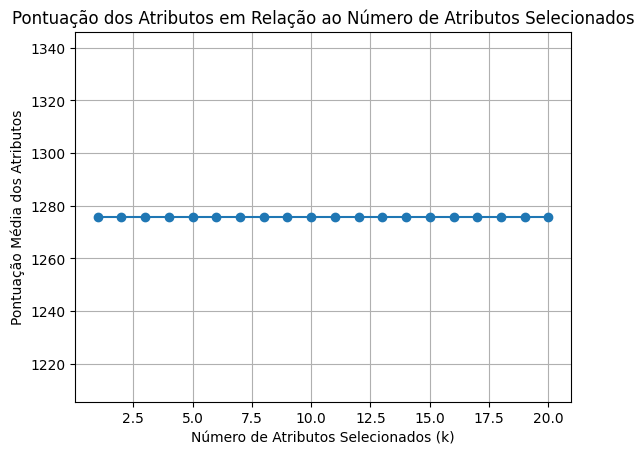

In [45]:
# Lista para armazenar as pontuações dos atributos
scores = []

# Número máximo de atributos
max_features = X.shape[1]

# Testa diferentes valores de k
for k in range(1, max_features + 1):
    # Seleção de atributos com SelectKBest
    best_var = SelectKBest(score_func=f_classif, k=k)

    # Executa a função de pontuação em (X, y) e obtém os atributos selecionados
    fit = best_var.fit(X, y)

    # Armazena a pontuação média dos atributos selecionados
    scores.append(fit.scores_.mean())

# Plota o gráfico de linha das pontuações dos atributos em relação ao número de atributos selecionados
plt.plot(range(1, max_features + 1), scores, marker='o')
plt.xlabel('Número de Atributos Selecionados (k)')
plt.ylabel('Pontuação Média dos Atributos')
plt.title('Pontuação dos Atributos em Relação ao Número de Atributos Selecionados')
plt.grid(True)
plt.show()

O gráfico acima nos mostra que a média dos atributos não aumenta conforme o número de atributos selecionados, por isso, selecionaremos um número baixo de atributos, como k=5, por exemplo.

In [46]:
# Seleção de atributos com SelectKBest
best_var = SelectKBest(score_func=f_classif, k=5)

# Executa a função de pontuação em (X, y) e obtém os atributos selecionados
fit = best_var.fit(X, y)

# Reduz X para os atributos selecionados
features = fit.transform(X)

# Resultados
print('\nNúmero original de atributos:', X.shape[1])
print('\nNúmero reduzido de atributos:', features.shape[1])

# Exibe os atributos orginais
print("\nAtributos Originais:", X.columns)

# Exibe as pontuações de cada atributos e os 5 escolhidas (com as pontuações mais altas)
np.set_printoptions(precision=3) # 3 casas decimais
print("\nScores dos Atributos Originais:", fit.scores_)
print("\nAtributos Selecionados:", best_var.get_feature_names_out(input_features=X.columns))


Número original de atributos: 20

Número reduzido de atributos: 5

Atributos Originais: Index(['all_pro', 'pro_bowl', 'starter', 'carAV', 'drAV', 'games', 'pass_comp',
       'pass_att', 'pass_yards', 'pass_tds', 'pass_int', 'rush_att',
       'rush_yards', 'rush_tds', 'receptions', 'rec_yards', 'rec_tds',
       'interceptions', 'sacks', 'tackles'],
      dtype='object')

Scores dos Atributos Originais: [8766.727 7451.575 1050.377 1874.834 2120.382  624.594  173.539  156.929
  175.23   208.416  132.356  290.135  299.281  332.92   389.177  373.298
  416.448  172.235  274.625  231.554]

Atributos Selecionados: ['all_pro' 'pro_bowl' 'starter' 'carAV' 'drAV']


Da mesma forma, procuramos os nomes dos atributos não selecionados, de modo a facilitar a exclusão das colunas dos dados de entrada do modelo.

In [47]:
# Supondo que 'fit' é o seletor de características ajustado
selected_indices = fit.get_support(indices=True)
all_indices = range(len(X.columns))
unselected_indices = list(set(all_indices) - set(selected_indices))

# Obter os nomes dos atributos não selecionados
unselected_attributes = X.columns[unselected_indices]

print("\nNomes dos Atributos Não Selecionados:")
print(unselected_attributes)


Nomes dos Atributos Não Selecionados:
Index(['games', 'pass_comp', 'pass_att', 'pass_yards', 'pass_tds', 'pass_int',
       'rush_att', 'rush_yards', 'rush_tds', 'receptions', 'rec_yards',
       'rec_tds', 'interceptions', 'sacks', 'tackles'],
      dtype='object')


In [48]:
X = X.drop(columns=['games', 'pass_comp', 'pass_att', 'pass_yards', 'pass_tds', 'pass_int',
       'rush_att', 'rush_yards', 'rush_tds', 'receptions', 'rec_yards',
       'rec_tds', 'interceptions', 'sacks', 'tackles'])
X

,all_pro,pro_bowl,starter,carAV,drAV
464,0,0,0,1.0,1.0
465,0,0,0,0.0,0.0
466,0,0,3,22.0,0.0
467,0,0,0,3.0,3.0
468,0,0,2,8.0,7.0
...,...,...,...,...,...
8970,0,0,0,0.0,0.0
8971,0,0,1,4.0,4.0
8972,0,0,0,0.0,0.0
8973,0,0,0,0.0,0.0


Fazendo o mesmo com os dados não vistos...

In [49]:
dados_nao_vistos = dados_nao_vistos.drop(columns=['games', 'pass_comp', 'pass_att', 'pass_yards', 'pass_tds', 'pass_int',
       'rush_att', 'rush_yards', 'rush_tds', 'receptions', 'rec_yards',
       'rec_tds', 'interceptions', 'sacks', 'tackles'])
dados_nao_vistos.sample(10)

,player,position,hall_of_fame,all_pro,pro_bowl,starter,carAV,drAV
427,Percy Snow,LB,False,0,0,1,10.0,9.0
79,Perry Smith,DB,False,0,0,3,18.0,16.0
142,Jack Smith,DB,False,0,0,0,0.0,0.0
138,Jessie Green,WR,False,0,0,0,0.0,0.0
313,Chuck Wiley,DE,False,0,0,1,13.0,6.0
76,Rob Morris,LB,False,0,0,4,24.0,24.0
8,Chris McAlister,DB,False,1,3,9,72.0,72.0
294,Carlos Francis,WR,False,0,0,0,0.0,0.0
264,DeAngelo Tyson,DT,False,0,0,0,6.0,6.0
207,Angelo Crowell,LB,False,0,0,3,19.0,19.0


Iniciamos o processo de separação do dataset. A divisão para dados de teste será de 20%, com uma estratificação em 'y', garantindo, assim, que a distribuição dos rótulos seja mantida nos conjuntos de treinamento e teste, bastante importante para conjuntos de dados desbalanceados, como é o caso do dataframe aborado. Além disso, faremos uma validação cruzada que é importante por vários motivos, dentre eles:

*   **Avaliação imparcial do modelo:** Ao usar diferentes partições dos dados para treinamento e teste, a validação cruzada fornece uma avaliação mais imparcial e robusta do desempenho do modelo, ajudando a evitar o overfitting e o underfitting.
*   **Avaliação da generalização:** A validação cruzada fornece uma estimativa mais confiável da capacidade de generalização do modelo para novos dados, pois ele é avaliado em várias partições dos dados, em vez de depender de apenas uma divisão específica.



In [50]:
test_size = 0.20 # tamanho do conjunto de teste
seed = 52 # semente aleatória

X_train, X_test, y_train, y_test = train_test_split(X, y,
    test_size=test_size, shuffle=True, random_state=seed, stratify=y) # holdout com estratificação

# Parâmetros e partições da validação cruzada
scoring = 'accuracy'
num_particoes = 10
kfold = StratifiedKFold(n_splits=num_particoes, shuffle=True, random_state=seed) # validação cruzada com estratificação

# Modelagem e treinamento

Após a separação dos dados em treinamento e teste, passamos para a etapa de avaliação dos diversos tipos de modelo disponíveis, a fim de selecionar o mais adequado para o problema em questão.

Dentre os modelos, citamos: Regressão Logística (LR), Classificador K-NN (KNN), Classificador de Árvore de Decisão (CART), Naive Bayes (NB), Máquina de Vetor Suporte (SVM) e métodos ensemble como Classificador Bagging, Classificador Random Forest (RF), Classificador Extra Trees (ET), Classificador AdaBoost (Ada) e Classificador Gradient Boosting (GB). Há também um Classificador por Votação que combina as previsões de vários modelos.

LR: 0.993978 (0.002581)
KNN: 0.993244 (0.003296)
CART: 0.991334 (0.003909)
NB: 0.964896 (0.007778)
SVM: 0.993831 (0.003135)
Bagging: 0.993537 (0.003783)
RF: 0.993831 (0.003929)
ET: 0.993538 (0.003726)
Ada: 0.992656 (0.002706)
GB: 0.993390 (0.003300)
Voting: 0.994418 (0.002526)


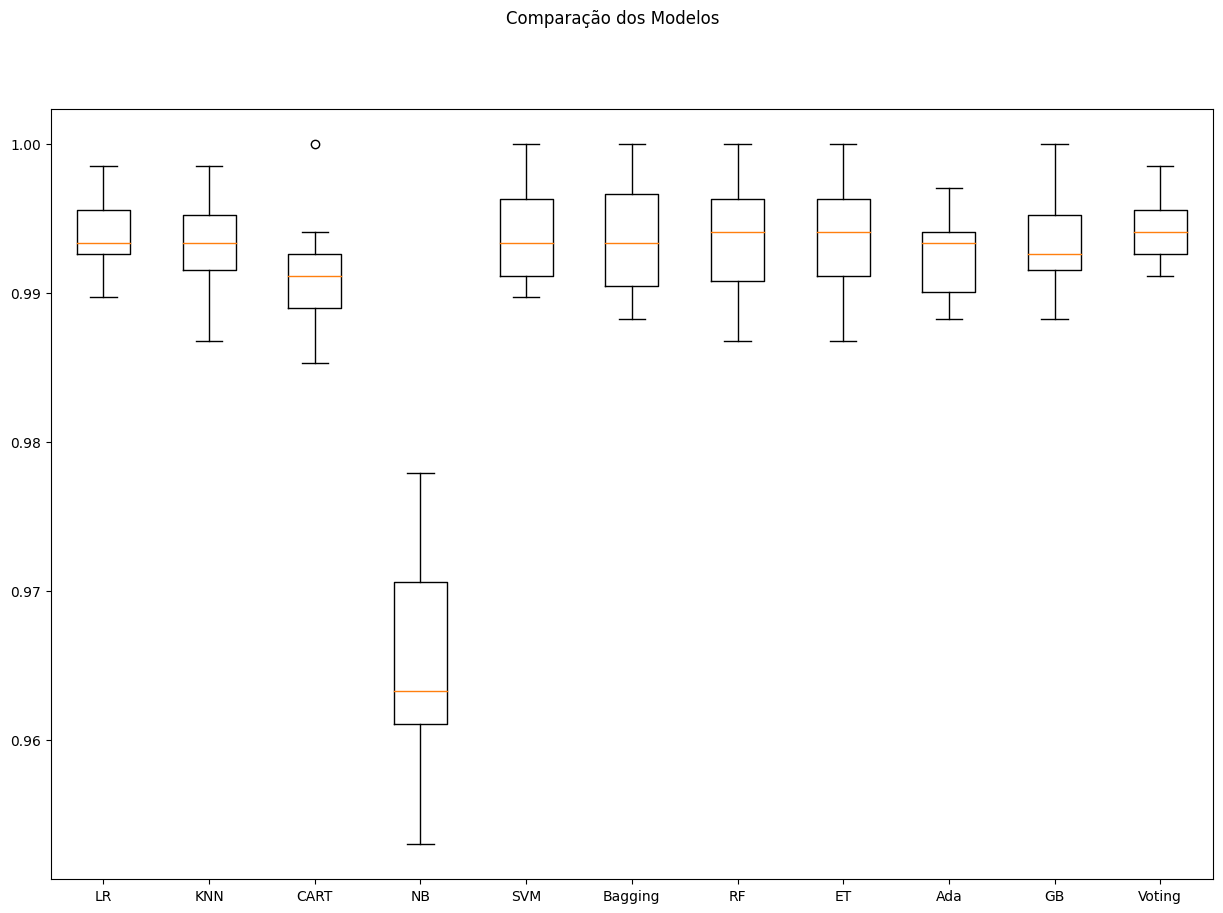

In [51]:
np.random.seed(52) # definindo uma semente global

# Lista que armazenará os modelos
models = []

# Criando os modelos e adicionando-os na lista de modelos
models.append(('LR', LogisticRegression(max_iter=200)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# Definindo os parâmetros do classificador base para o BaggingClassifier
base = DecisionTreeClassifier()
num_trees = 100
max_features = 3

# Criando os modelos para o VotingClassifier
bases = []
model1 = LogisticRegression(max_iter=200)
bases.append(('logistic', model1))
model2 = DecisionTreeClassifier()
bases.append(('cart', model2))
model3 = SVC()
bases.append(('svm', model3))

# Criando os ensembles e adicionando-os na lista de modelos
models.append(('Bagging', BaggingClassifier(base_estimator=base, n_estimators=num_trees)))
models.append(('RF', RandomForestClassifier(n_estimators=num_trees, max_features=max_features)))
models.append(('ET', ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features)))
models.append(('Ada', AdaBoostClassifier(n_estimators=num_trees)))
models.append(('GB', GradientBoostingClassifier(n_estimators=num_trees)))
models.append(('Voting', VotingClassifier(bases)))

# Listas para armazenar os resultados
results = []
names = []

# Avaliação dos modelos
for name, model in models:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(15,10))
fig.suptitle('Comparação dos Modelos')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

Com base nos resultados, todos os modelos atingiram uma alta precisão (acima de 0,96) com pequenos desvios padrão, indicando um bom desempenho geral.

O classificador por votação tem uma boa pontuação média (0,9944), com o menor desvio padrão, sugerindo que ele é um modelo robusto neste caso.

Posteriormente, propomos duas transformações de dados: padronização (usando StandarScaler) e normalização (usando MinMaxScaler). A padronização dimensiona os recursos dos dados para ter uma média de 0 e um desvio padrão de 1. Já, a normalização dimensiona os valores das linhas para uma faixa entre 0 e 1. Em seguida, criamos pipelines diferentes no código para cada modelo, alguns com padronização, outros com normalização e o restante sem nenhum pré-processamento aplicado aos dados originais.

LR-orig: 0.99398 (0.00258)
KNN-orig: 0.99324 (0.00330)
CART-orig: 0.99133 (0.00391)
NB-orig: 0.96490 (0.00778)
SVM-orig: 0.99383 (0.00314)
Bag-orig: 0.99354 (0.00378)
RF-orig: 0.99383 (0.00393)
ET-orig: 0.99354 (0.00373)
Ada-orig: 0.99266 (0.00271)
GB-orig: 0.99339 (0.00330)
Vot-orig: 0.99442 (0.00253)
LR-padr: 0.99383 (0.00235)
KNN-padr: 0.99383 (0.00314)
CART-padr: 0.99133 (0.00407)
NB-padr: 0.96490 (0.00778)
SVM-padr: 0.99368 (0.00389)
Bag-padr: 0.99324 (0.00316)
RF-padr: 0.99339 (0.00395)
ET-padr: 0.99368 (0.00360)
Ada-padr: 0.99266 (0.00271)
GB-padr: 0.99339 (0.00330)
Vot-padr: 0.99398 (0.00325)
LR-norm: 0.99383 (0.00269)
KNN-norm: 0.99427 (0.00331)
CART-norm: 0.99133 (0.00331)
NB-norm: 0.96490 (0.00778)
SVM-norm: 0.99413 (0.00420)
Bag-norm: 0.99324 (0.00411)
RF-norm: 0.99354 (0.00288)
ET-norm: 0.99354 (0.00367)
Ada-norm: 0.99266 (0.00271)
GB-norm: 0.99339 (0.00343)
Vot-norm: 0.99427 (0.00350)


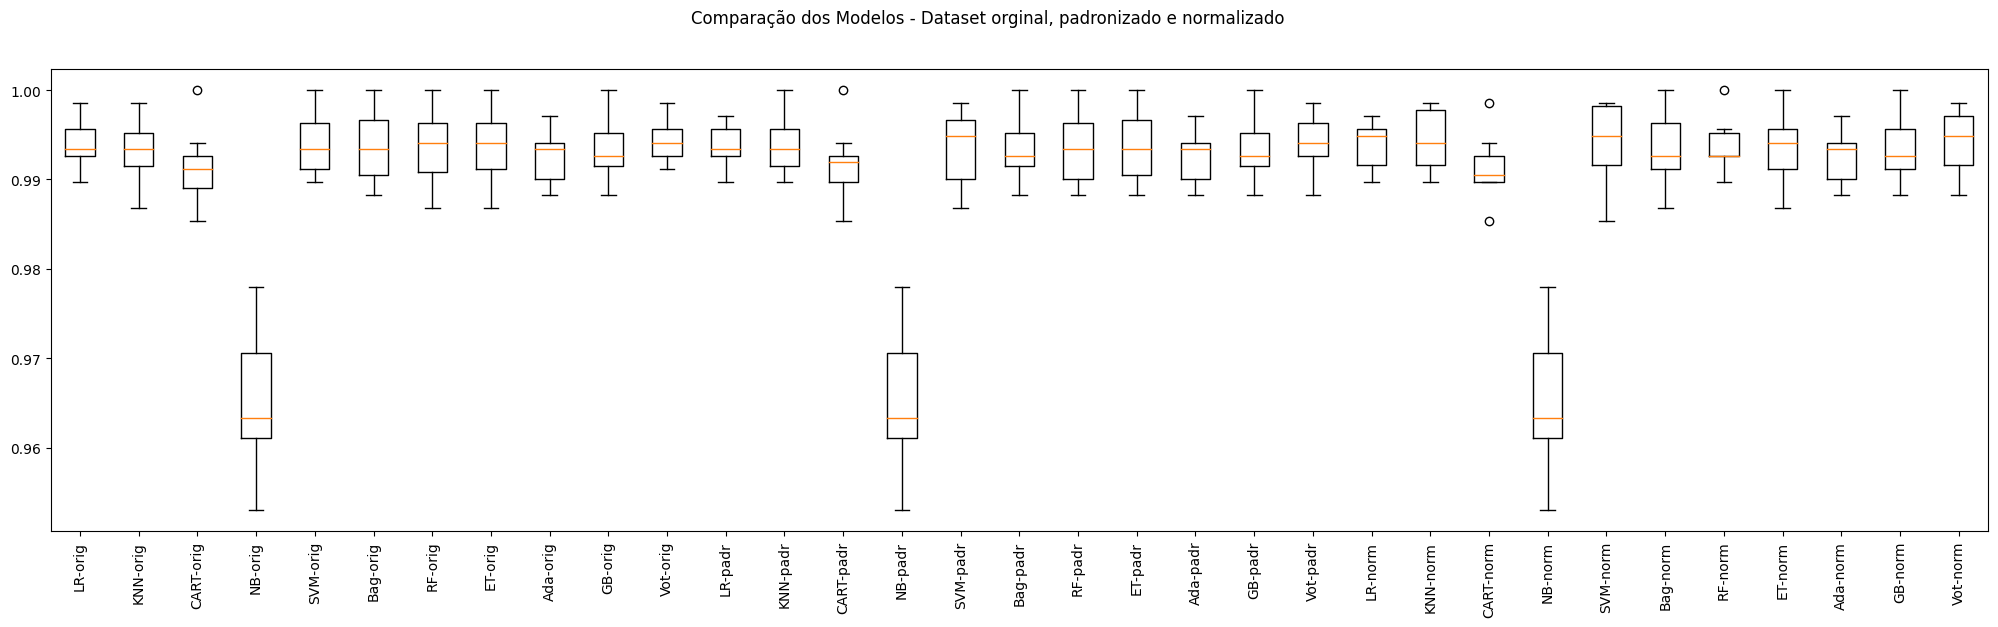

In [52]:
np.random.seed(52) # definindo uma semente global para este bloco

# Listas para armazenar os armazenar os pipelines e os resultados para todas as visões do dataset
pipelines = []
results = []
names = []


# Criando os elementos do pipeline

# Algoritmos que serão utilizados
reg_log = ('LR', LogisticRegression(max_iter=200))
knn = ('KNN', KNeighborsClassifier())
cart = ('CART', DecisionTreeClassifier())
naive_bayes = ('NB', GaussianNB())
svm = ('SVM', SVC())
bagging = ('Bag', BaggingClassifier(base_estimator=base, n_estimators=num_trees))
random_forest = ('RF', RandomForestClassifier(n_estimators=num_trees, max_features=max_features))
extra_trees = ('ET', ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features))
adaboost = ('Ada', AdaBoostClassifier(n_estimators=num_trees))
gradient_boosting = ('GB', GradientBoostingClassifier(n_estimators=num_trees))
voting = ('Voting', VotingClassifier(bases))

# Transformações que serão utilizadas
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())


# Montando os pipelines

# Dataset original
pipelines.append(('LR-orig', Pipeline([reg_log])))
pipelines.append(('KNN-orig', Pipeline([knn])))
pipelines.append(('CART-orig', Pipeline([cart])))
pipelines.append(('NB-orig', Pipeline([naive_bayes])))
pipelines.append(('SVM-orig', Pipeline([svm])))
pipelines.append(('Bag-orig', Pipeline([bagging])))
pipelines.append(('RF-orig', Pipeline([random_forest])))
pipelines.append(('ET-orig', Pipeline([extra_trees])))
pipelines.append(('Ada-orig', Pipeline([adaboost])))
pipelines.append(('GB-orig', Pipeline([gradient_boosting])))
pipelines.append(('Vot-orig', Pipeline([voting])))

# Dataset Padronizado
pipelines.append(('LR-padr', Pipeline([standard_scaler, reg_log])))
pipelines.append(('KNN-padr', Pipeline([standard_scaler, knn])))
pipelines.append(('CART-padr', Pipeline([standard_scaler, cart])))
pipelines.append(('NB-padr', Pipeline([standard_scaler, naive_bayes])))
pipelines.append(('SVM-padr', Pipeline([standard_scaler, svm])))
pipelines.append(('Bag-padr', Pipeline([standard_scaler, bagging])))
pipelines.append(('RF-padr', Pipeline([standard_scaler, random_forest])))
pipelines.append(('ET-padr', Pipeline([standard_scaler, extra_trees])))
pipelines.append(('Ada-padr', Pipeline([standard_scaler, adaboost])))
pipelines.append(('GB-padr', Pipeline([standard_scaler, gradient_boosting])))
pipelines.append(('Vot-padr', Pipeline([standard_scaler, voting])))

# Dataset Normalizado
pipelines.append(('LR-norm', Pipeline([min_max_scaler, reg_log])))
pipelines.append(('KNN-norm', Pipeline([min_max_scaler, knn])))
pipelines.append(('CART-norm', Pipeline([min_max_scaler, cart])))
pipelines.append(('NB-norm', Pipeline([min_max_scaler, naive_bayes])))
pipelines.append(('SVM-norm', Pipeline([min_max_scaler, svm])))
pipelines.append(('Bag-norm', Pipeline([min_max_scaler, bagging])))
pipelines.append(('RF-norm', Pipeline([min_max_scaler, random_forest])))
pipelines.append(('ET-norm', Pipeline([min_max_scaler, extra_trees])))
pipelines.append(('Ada-norm', Pipeline([min_max_scaler, adaboost])))
pipelines.append(('GB-norm', Pipeline([min_max_scaler, gradient_boosting])))
pipelines.append(('Vot-norm', Pipeline([min_max_scaler, voting])))

# Executando os pipelines
for name, model in pipelines:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %.5f (%.5f)" % (name, cv_results.mean(), cv_results.std()) # formatando para 5 casas decimais
    print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(25,6))
fig.suptitle('Comparação dos Modelos - Dataset orginal, padronizado e normalizado')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names, rotation=90)
plt.show()

Podemos, também, buscar a otimização de hiperparâmetros. Modelos como K-Nearest Neighbors (KNN), Random Forest e Gradient Boosting também podem ser bons candidatos para otimização, pois possuem diversos hiperparâmetros que podem influenciar significativamente o desempenho.

A título de ilustração, vamos aplicar a técnica do Grid Search, na qual todas as combinações possíveis de valores predefinidos para os hiperarametros selecionados.

Os seguintes parâmetros serão otimizados:


*   **KNN__n_neighbors:** define o número de vizinhos mais próximos utilizados para a classificação.
*   **KNN__metric:** testa diferentes métricas de distância para o classificador KNN: euclidiana, manhattan e minkowski.


In [53]:
# Tuning do KNN

np.random.seed(52) # definindo uma semente global para este bloco

pipelines = []

# Definindo os componentes do pipeline
knn = ('KNN', KNeighborsClassifier())
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())

pipelines.append(('knn-orig', Pipeline(steps=[knn])))
pipelines.append(('knn-padr', Pipeline(steps=[standard_scaler, knn])))
pipelines.append(('knn-norm', Pipeline(steps=[min_max_scaler, knn])))

param_grid = {
    'KNN__n_neighbors': [1,3,5,7,9,11,13,15,17,19,21],
    'KNN__metric': ["euclidean", "manhattan", "minkowski"],
}

# Prepara e executa o GridSearchCV
for name, model in pipelines:
    grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
    grid.fit(X_train, y_train)
    # imprime a melhor configuração
    print("Sem tratamento de missings: %s - Melhor: %f usando %s" % (name, grid.best_score_, grid.best_params_))

Sem tratamento de missings: knn-orig - Melhor: 0.993538 usando {'KNN__metric': 'manhattan', 'KNN__n_neighbors': 19}
Sem tratamento de missings: knn-padr - Melhor: 0.994272 usando {'KNN__metric': 'manhattan', 'KNN__n_neighbors': 15}
Sem tratamento de missings: knn-norm - Melhor: 0.994566 usando {'KNN__metric': 'euclidean', 'KNN__n_neighbors': 11}


# Avaliação de Resultados

Agora, analisamos os resultados de três modelos diferentes a partir das métricas: a **acurácia**, o **f1-score**, a **precisão**, a **matriz de confusão** e **área sob a curva ROC (AUC-ROC)**.

A acurácia é uma métrica simples que mede a proporção de previsões corretas feitas pelo modelo. Matematicamente, a acurácia é calculada como o número de previsões corretas dividido pelo número total de previsões. Ela é útil quando as classes estão balanceadas no conjunto de dados. Entretanto, uma acurácia alta pode ser enganosa, visto que a mesma pode ser obtida simplesmente prevendo a classe majoritária em todas as instâncias.

O F1-score é uma métrica que combina precisão e recall em um único número. É a média harmônica dessas duas métricas. A precisão mede a proporção de instâncias classificadas como positivas que são realmente positivas. O recall, por outro lado, mede a proporção de instâncias positivas que foram corretamente identificadas pelo modelo. Ele é útil quando há um desequilíbrio entre as classes no conjunto de dados, pois leva em consideração tanto os falsos positivos quanto os falsos negativos.

A precisão é a proporção de instâncias positivas previstas corretamente em relação ao total de instâncias positivas previstas pelo modelo. Ela é útil quando o foco está em minimizar os falsos positivos, ou seja, quando é importante garantir que as instâncias classificadas como positivas sejam realmente positivas.


A matriz de confusão, é uma tabela que mostra as frequências de classificação corretas e incorretas feitas pelo modelo para cada classe. Ela fornece informações detalhadas sobre como o modelo está performando para cada classe individualmente, incluindo falsos positivos, falsos negativos, verdadeiros positivos e verdadeiros negativos.

Já, a AUC-ROC é uma medida da capacidade do modelo de distinguir entre classes. Quanto maior a AUC-ROC, melhor o modelo está em separar as classes. É uma métrica útil quando o conjunto de dados está desbalanceado.



1.   VotingClassifier sem transformação de dados



In [54]:
# Avaliação do modelo com o conjunto de testes

# Preparação do modelo -> VOTING
model = VotingClassifier(bases)
model.fit(X_train, y_train)

# Estimativa da acurácia no conjunto de teste
predictions = model.predict(X_test)
print("Acurácia:", accuracy_score(y_test, predictions))
print("\n")

# Calculando o F1-Score
f1 = f1_score(y_test, predictions)

print("F1-Score:", f1)
print("\n")

# Estimando a precisão
precision = precision_score(y_test, predictions)
print("Precisão:", precision)
print("\n")


# Estimando a matriz de confusão
cm = confusion_matrix(y_test, predictions)

vp = cm[1, 1]
fn = cm[1, 0]
fp = cm[0, 1]
vn = cm[0, 0]


print("Matriz de Confusão:")
print(f"{vn} verdadeiros negativos, {fp} falsos positivos")
print(f"{fn} falsos negativos, {vp} verdadeiros positivos")
print("\n")

# Estimando a AUC-ROC
auc_roc = roc_auc_score(y_test, predictions)
print("AUC-ROC:", auc_roc)

Acurácia: 0.994128009395185


F1-Score: 0.7368421052631579


Precisão: 0.875


Matriz de Confusão:
1679 verdadeiros negativos, 2 falsos positivos
8 falsos negativos, 14 verdadeiros positivos


AUC-ROC: 0.8175869341841977




2.   K-Nearest Neighbors sem transformação de dados



In [55]:
# Avaliação do modelo com o conjunto de testes

# Preparação do modelo -> KNN
model = KNeighborsClassifier()
model.fit(X_train, y_train)

# Estimativa da acurácia no conjunto de teste
predictions = model.predict(X_test)
print("Acurácia:", accuracy_score(y_test, predictions))
print("\n")

# Calculando o F1-Score
f1 = f1_score(y_test, predictions)

print("F1-Score:", f1)
print("\n")

# Estimando a precisão
precision = precision_score(y_test, predictions)
print("Precisão:", precision)
print("\n")


# Estimando a matriz de confusão
cm = confusion_matrix(y_test, predictions)

vp = cm[1, 1]
fn = cm[1, 0]
fp = cm[0, 1]
vn = cm[0, 0]


print("Matriz de Confusão:")
print(f"{vn} verdadeiros negativos, {fp} falsos positivos")
print(f"{fn} falsos negativos, {vp} verdadeiros positivos")
print("\n")

# Estimando a AUC-ROC
auc_roc = roc_auc_score(y_test, predictions)
print("AUC-ROC:", auc_roc)

Acurácia: 0.9911920140927775


F1-Score: 0.5454545454545455


Precisão: 0.8181818181818182


Matriz de Confusão:
1679 verdadeiros negativos, 2 falsos positivos
13 falsos negativos, 9 verdadeiros positivos


AUC-ROC: 0.703950570547834


3.   Regressão Logística com dataset padronizado



In [56]:
# Preparação do modelo
scaler = StandardScaler().fit(X_train) # ajuste do scaler com o conjunto de treino
rescaledX = scaler.transform(X_train) # aplicação da padronização no conjunto de treino
model = LogisticRegression(max_iter=200)
model.fit(rescaledX, y_train)

# Estimativa da acurácia no conjunto de teste
rescaledTestX = scaler.transform(X_test) # aplicação da padronização no conjunto de teste
predictions = model.predict(rescaledTestX)
print("Acurácia:", accuracy_score(y_test, predictions))
print("\n")

# Calculando o F1-Score
f1 = f1_score(y_test, predictions)

print("F1-Score:", f1)
print("\n")

# Estimando a precisão
precision = precision_score(y_test, predictions)
print("Precisão:", precision)
print("\n")


# Estimando a matriz de confusão
cm = confusion_matrix(y_test, predictions)

vp = cm[1, 1]
fn = cm[1, 0]
fp = cm[0, 1]
vn = cm[0, 0]


print("Matriz de Confusão:")
print(f"{vn} verdadeiros negativos, {fp} falsos positivos")
print(f"{fn} falsos negativos, {vp} verdadeiros positivos")
print("\n")

# Estimando a AUC-ROC
auc_roc = roc_auc_score(y_test, predictions)
print("AUC-ROC:", auc_roc)

Acurácia: 0.992953611274222


F1-Score: 0.6666666666666665


Precisão: 0.8571428571428571


Matriz de Confusão:
1679 verdadeiros negativos, 2 falsos positivos
10 falsos negativos, 12 verdadeiros positivos


AUC-ROC: 0.7721323887296523


Após a análise dos 3 tipos diferentes de modelo, vimos que a melhor opção é a de VotingClassifier, sem a necessidade de transformação de dados.

**Conclusão**

Um resultado com uma acurácia de 0,994, um F1-score de 0,737, uma precisão de 0,875, uma AUC-ROC de 0,818 e uma matriz de confusão de [[1679, 2], [8, 14]] indica um desempenho geral muito bom do modelo de classificação.

A acurácia com esse valor indica que a grande maioria das previsões feitas pelo modelo estão corretas. Uma pontuação de F1-score de 0,737 é bastante alta e indica um bom equilíbrio entre precisão e recall no modelo. A precisão, também alta, mostra que o modelo está fazendo um bom trabalho em minimizar os falsos positivos. O valor de 0,818 de AUC-ROC é um desempenho bem decente, mostrando que o modelo está conseguindo separar as classes positivas e negativas. Por último, a matriz de confusão nos informa que o modelo errou muito pouco em suas classificações.

Em resumo, o resultado apresentado mostra um desempenho promissor, indicando um modelo bem calibrado e eficaz na classificação das instâncias do conjunto de dados, com um baixo número de erros, um bom equilíbrio entre precisão e recall e uma capacidade robusta de generalização. No entanto, é essencial continuar refinando e validando esses modelos à medida que novos dados se tornam disponíveis e o contexto do problem evolui, ou seja, será que a régua para ser hall da fama continuará sendo a mesma pelos próximos 10, 20 ou 30 anos?

# Extra

Vamos trabalhar novamente com o mesmo modelo, simulando a aplicação do mesmo em dados não vistos citados anteriormente

In [57]:
entrada = pd.DataFrame(dados_nao_vistos)
array_entrada = entrada.values

array_entrada[0:10]

array([['Rich Wingo', 'LB', False, 0, 0, 4, 21.0, 21.0],
       ['Brad Muster', 'RB', False, 0, 0, 5, 31.0, 29.0],
       ['Chester Pitts', 'OT', False, 0, 0, 7, 43.0, 42.0],
       ['Guy Bingham', 'C', False, 0, 0, 1, 17.0, 17.0],
       ['Larry Kolic', 'LB', False, 0, 0, 0, 2.0, 2.0],
       ['Keenan Lewis', 'DB', False, 0, 0, 3, 23.0, 11.0],
       ['Andy Hawkins', 'LB', False, 0, 0, 2, 20.0, 17.0],
       ['Nate Hill', 'DE', False, 0, 0, 0, 0.0, 0.0],
       ['Seth McKinney', 'C', False, 0, 0, 3, 21.0, 15.0],
       ['Duane Clemons', 'DE', False, 0, 0, 5, 39.0, 11.0]], dtype=object)

In [58]:
model = VotingClassifier(bases)
model.fit(X_train, y_train)

X_entrada = array_entrada[:,3:8].astype(float)
y_entrada = array_entrada[:,2].astype(bool)

saidas = model.predict(X_entrada)

In [59]:
acuracia = accuracy_score(y_entrada, saidas)
f1 = f1_score(y_entrada, saidas)
precision = precision_score(y_entrada, saidas)
cm = confusion_matrix(y_entrada, saidas)
auc_roc = roc_auc_score(y_entrada, saidas)

vp = cm[1, 1]
fn = cm[1, 0]
fp = cm[0, 1]
vn = cm[0, 0]

print(f"acurácia: {acuracia}")
print("\n")
print(f"f1-score: {f1}")
print("\n")
print(f"Precisão: {precision}")
print("\n")
print("Matriz de Confusão:")
print(f"{vn} verdadeiros negativos, {fp} falsos positivos")
print(f"{fn} falsos negativos, {vp} verdadeiros positivos")
print("\n")
print(f"AUC-ROC: {auc_roc}")

acurácia: 0.9935344827586207


f1-score: 0.7272727272727272


Precisão: 0.8


Matriz de Confusão:
457 verdadeiros negativos, 1 falsos positivos
2 falsos negativos, 4 verdadeiros positivos


AUC-ROC: 0.8322416302765647


Por último, iremos fazer um exercício de futurologia. Com o auxílio do modelo definido como o melhor, preveremos quais dos jogadores inelegíveis serão, provavelmente, membros do hall da fama.

In [60]:
inelegiveis

,player,position,to,hall_of_fame,all_pro,pro_bowl,starter,carAV,drAV,games,...,pass_int,rush_att,rush_yards,rush_tds,receptions,rec_yards,rec_tds,interceptions,sacks,tackles
6688,Tom Brady,QB,2020.0,False,3,14,19,179.0,170.0,301.0,...,191.0,636.0,1043.0,25.0,3.0,65.0,0.0,0.0,0.0,0.0
6756,Drew Brees,QB,2020.0,False,1,13,19,167.0,26.0,287.0,...,243.0,498.0,752.0,25.0,8.0,74.0,1.0,0.0,0.0,0.0
6797,Steve Smith,WR,2016.0,False,2,5,14,103.0,92.0,219.0,...,0.0,57.0,387.0,2.0,1031.0,14731.0,81.0,0.0,0.0,0.0
6940,Julius Peppers,DE,2018.0,False,3,9,16,129.0,71.0,266.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,160.0,557.0
6949,Dwight Freeney,DE,2017.0,False,3,7,11,78.0,75.0,218.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,126.0,299.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11216,Tremayne Anchrum,G,2020.0,False,0,0,0,0.0,0.0,12.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11217,Stephen Sullivan,TE,2020.0,False,0,0,0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11218,Tyrie Cleveland,WR,2020.0,False,0,0,0,0.0,0.0,10.0,...,0.0,0.0,0.0,0.0,6.0,63.0,0.0,0.0,0.0,1.0
11219,Derrek Tuszka,LB,2020.0,False,0,0,0,1.0,1.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0


Deletamos as colunas desnecessárias, segundo o feature selection feito anteriormente.

In [61]:
inelegiveis = inelegiveis.drop(columns=['to','games', 'pass_comp', 'pass_att', 'pass_yards', 'pass_tds', 'pass_int',
       'rush_att', 'rush_yards', 'rush_tds', 'receptions', 'rec_yards',
       'rec_tds', 'interceptions', 'sacks', 'tackles'])

inelegiveis.sort_values(by='carAV', ascending=False)

,player,position,hall_of_fame,all_pro,pro_bowl,starter,carAV,drAV
6688,Tom Brady,QB,False,3,14,19,179.0,170.0
6756,Drew Brees,QB,False,1,13,19,167.0,26.0
7623,Aaron Rodgers,QB,False,3,9,12,151.0,151.0
7384,Philip Rivers,QB,False,0,8,15,149.0,24.0
8255,Matt Ryan,QB,False,1,4,13,140.0,140.0
...,...,...,...,...,...,...,...,...
11062,Julian Okwara,DE,False,0,0,0,0.0,0.0
10890,Trevon Wesco,TE,False,0,0,0,0.0,0.0
10889,Gary Jennings Jr,WR,False,0,0,0,0.0,0.0
11065,Brandon Jones,DB,False,0,0,0,0.0,0.0


In [64]:
entrada_inelegiveis = pd.DataFrame(inelegiveis)
array_entrada_inelegiveis = entrada_inelegiveis.values

X_inelegiveis = array_entrada_inelegiveis[:,3:8].astype(float) # dados de entrada do modelo
y_inelegiveis = array_entrada_inelegiveis[:,2].astype(bool) # dados de saída do modelo
jogadores = array_entrada_inelegiveis[:,0].astype(str) # nome dos jogadores
posicoes = array_entrada_inelegiveis[:,1].astype(str) # posição dos jogadores

saidas = model.predict(X_inelegiveis)

# identificando os índices onde a saída é True
indices_hof = np.where(saidas == True)[0]

# criando um dicionário para armazenar jogadores por posição
jogadores_por_posicao = {}

# preenchendo o dicionário com os jogadores correspondentes às posições
for indice in indices_hof:
    posicao = posicoes[indice]
    jogador = jogadores[indice]
    if posicao not in jogadores_por_posicao:
        jogadores_por_posicao[posicao] = []
    jogadores_por_posicao[posicao].append(jogador)

# exibindo os jogadores agrupados por posição
print(f"{len(indices_hof)} Prováveis futuros membros do Hall da Fama por posição\n")
for posicao, jogadores in jogadores_por_posicao.items():
    print(f"Posição: {posicao}")
    for jogador in jogadores:
        print(jogador)
    print()

28 Prováveis futuros membros do Hall da Fama por posição

Posição: QB
Tom Brady
Drew Brees
Philip Rivers
Ben Roethlisberger
Aaron Rodgers
Matt Ryan
Cam Newton
Russell Wilson

Posição: DE
Julius Peppers
Dwight Freeney
Calais Campbell
J.J. Watt

Posição: WR
Andre Johnson
Larry Fitzgerald

Posição: LB
Terrell Suggs
DeMarcus Ware
Von Miller
Bobby Wagner

Posição: TE
Jason Witten

Posição: OT
Jahri Evans
Joe Thomas
Marshal Yanda

Posição: DB
Darrelle Revis
Earl Thomas
Patrick Peterson

Posição: C
Maurkice Pouncey

Posição: DT
Geno Atkins
Aaron Donald

